In [9]:
%load_ext autoreload
%autoreload 2

import pandas as pd

from src.utils import *
from src.settings import Settings, Paths
from src.data import SnapDataLoader, EDA




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Initialization
The code snippet initializes a `Settings` object and loads various settings into it. Then, it creates a `Paths` object, passing the previously created `settings` object to it. Finally, it calls a method to load device-specific paths based on the settings loaded earlier.


In [10]:
settings = Settings()
settings.load_settings()

paths = Paths(settings=settings)
paths.load_device_paths()

# Loading and Previewing the Data

In [11]:
eda_analyzer = EDA(paths=paths)
print(f"Number of train samples : {eda_analyzer.train_df.shape[0]}")
print(f"Number of test samples : {eda_analyzer.train_df.shape[0]}")

eda_analyzer.train_df.info()  
eda_analyzer.test_df.info() 

Number of train samples : 80692
Number of test samples : 80692
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80692 entries, 0 to 80691
Data columns (total 26 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   passenger_unique_identifier                      80692 non-null  float64
 1   driver_unique_identifier                         71166 non-null  float64
 2   approximate_distance_meter                       80692 non-null  int64  
 3   final_price                                      80692 non-null  float64
 4   waiting_time_enabled                             80692 non-null  int64  
 5   second_destination_final_price                   80692 non-null  float64
 6   round_ride_final_price                           80692 non-null  float64
 7   for_friend_enabled                               80692 non-null  int64  
 8   is_voucher_used                            

# Missing Values

In [12]:
eda_analyzer.check_missing_values()

                          Train Missing Rate (%)  Test Missing Rate (%)
driver_unique_identifier               11.805383                    NaN
is_voucher_used                       100.000000             100.000000
treatment_group                        11.805383              11.731412


# Summary Statistics

In [13]:
combined_summary = eda_analyzer.summary_statistics()
combined_summary

Calculating summary statistics for features ...


,count_Train,mean_Train,std_Train,min_Train,25%_Train,50%_Train,75%_Train,max_Train,count_Test,mean_Test,std_Test,min_Test,25%_Test,50%_Test,75%_Test,max_Test
passenger_unique_identifier,80692.0,7.838708e+07,3.021072e+07,2.000000,5.866339e+07,8.117180e+07,1.030939e+08,1.241595e+08,7774.0,7.885673e+07,3.008155e+07,156662.000000,5.880147e+07,8.215870e+07,1.034668e+08,1.242158e+08
driver_unique_identifier,71166.0,4.893675e+06,2.201403e+06,2.000000,3.103104e+06,5.107074e+06,6.846604e+06,7.981226e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
approximate_distance_meter,80692.0,5.724254e+03,8.488148e+03,0.000000,2.980000e+03,4.663000e+03,6.620250e+03,7.969110e+05,7774.0,5.550687e+03,5.354285e+03,0.000000,2.957250e+03,4.659500e+03,6.556750e+03,1.508450e+05
final_price,80692.0,1.308436e+03,7.862574e+02,200.000000,9.600000e+02,1.200000e+03,1.480000e+03,6.452000e+04,7774.0,1.299395e+03,5.781646e+02,200.000000,9.800000e+02,1.220000e+03,1.480000e+03,8.720000e+03
waiting_time_enabled,80692.0,1.269023e-02,1.119345e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,7774.0,1.517880e-02,1.222715e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
second_destination_final_price,80692.0,2.777276e+01,1.798608e+02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,4.829412e+03,7774.0,2.499506e+01,1.695254e+02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.511484e+03
round_ride_final_price,80692.0,9.809620e+00,1.055305e+02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.980864e+03,7774.0,8.628482e+00,1.005643e+02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.907648e+03
for_friend_enabled,80692.0,1.777128e-02,1.321199e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,7774.0,1.942372e-02,1.380177e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
is_voucher_used,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
intercity,80692.0,6.816041e-04,2.609881e-02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,7774.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


# Distribution of Numerical Features

Percentage of non-zero entries in second_destination_final_price: 2.72%
Percentage of non-zero entries in round_ride_final_price: 0.99%


<Figure size 1200x600 with 0 Axes>

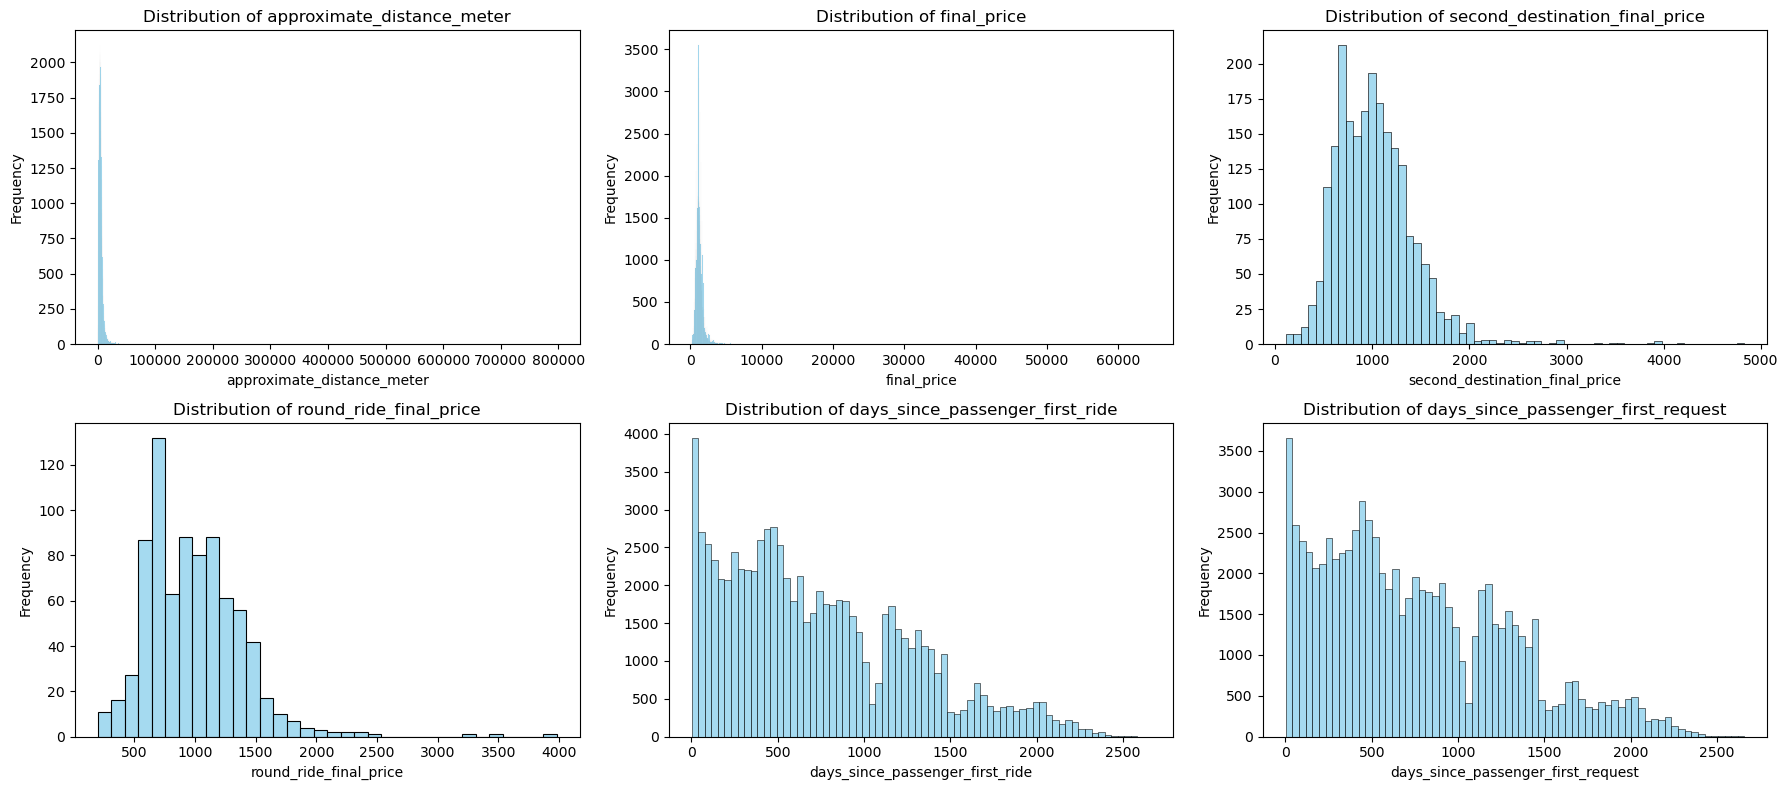

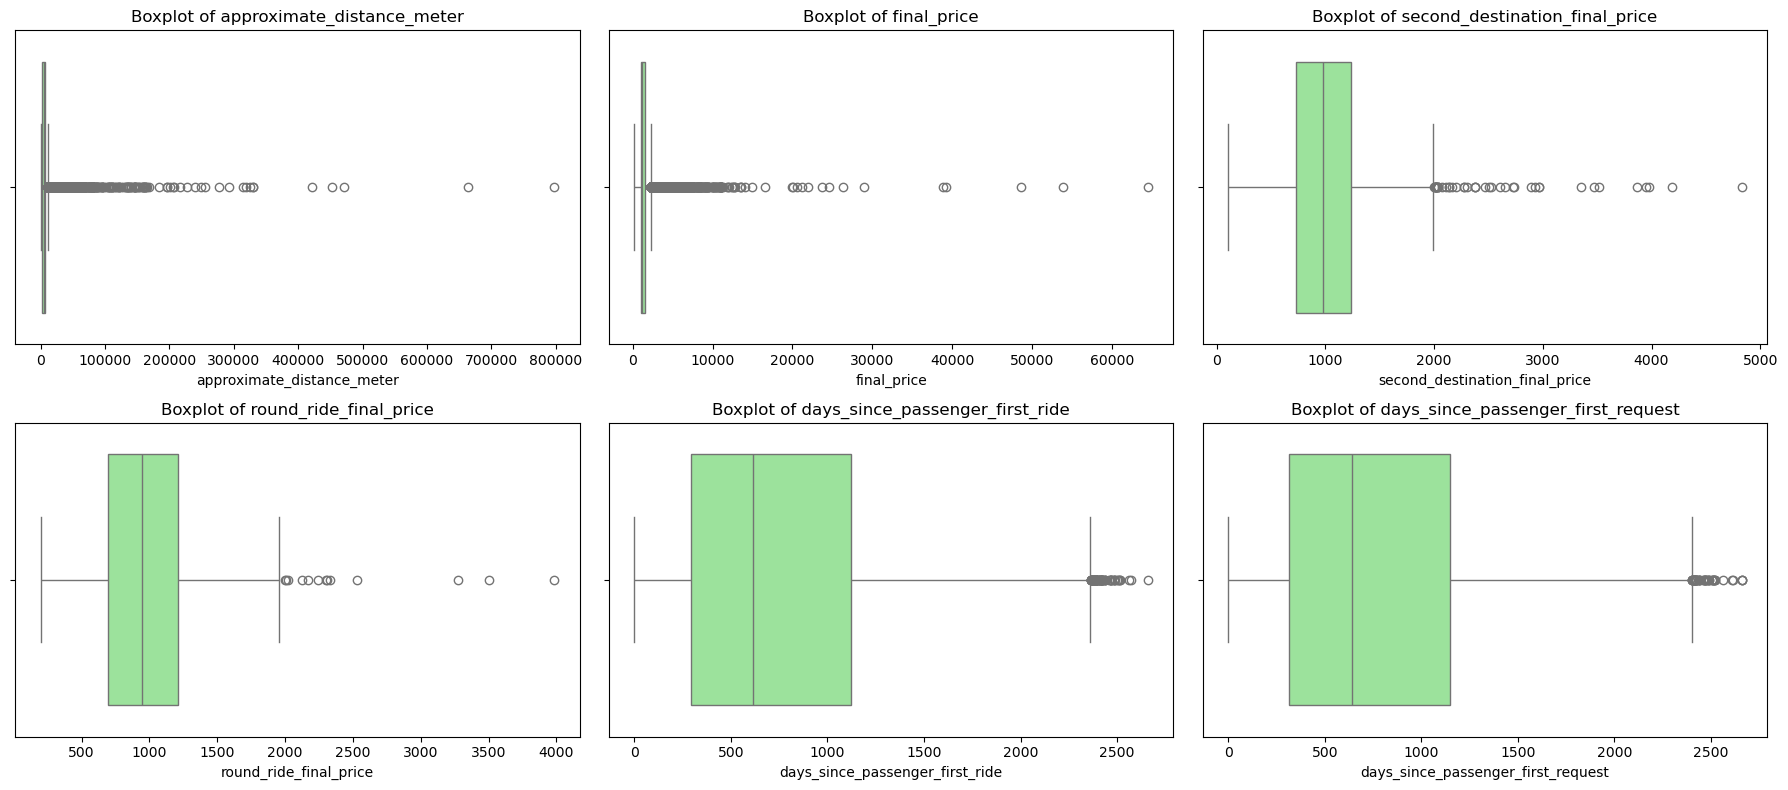

In [14]:
numerical_features = ['approximate_distance_meter', 'final_price', 'second_destination_final_price',
                      'round_ride_final_price', 'days_since_passenger_first_ride',
                      'days_since_passenger_first_request']
eda_analyzer.analyze_non_zero_distributions()
eda_analyzer.plot_numerical_distributions(numerical_features, mode='train')
eda_analyzer.plot_numerical_boxplots(numerical_features, mode='train')

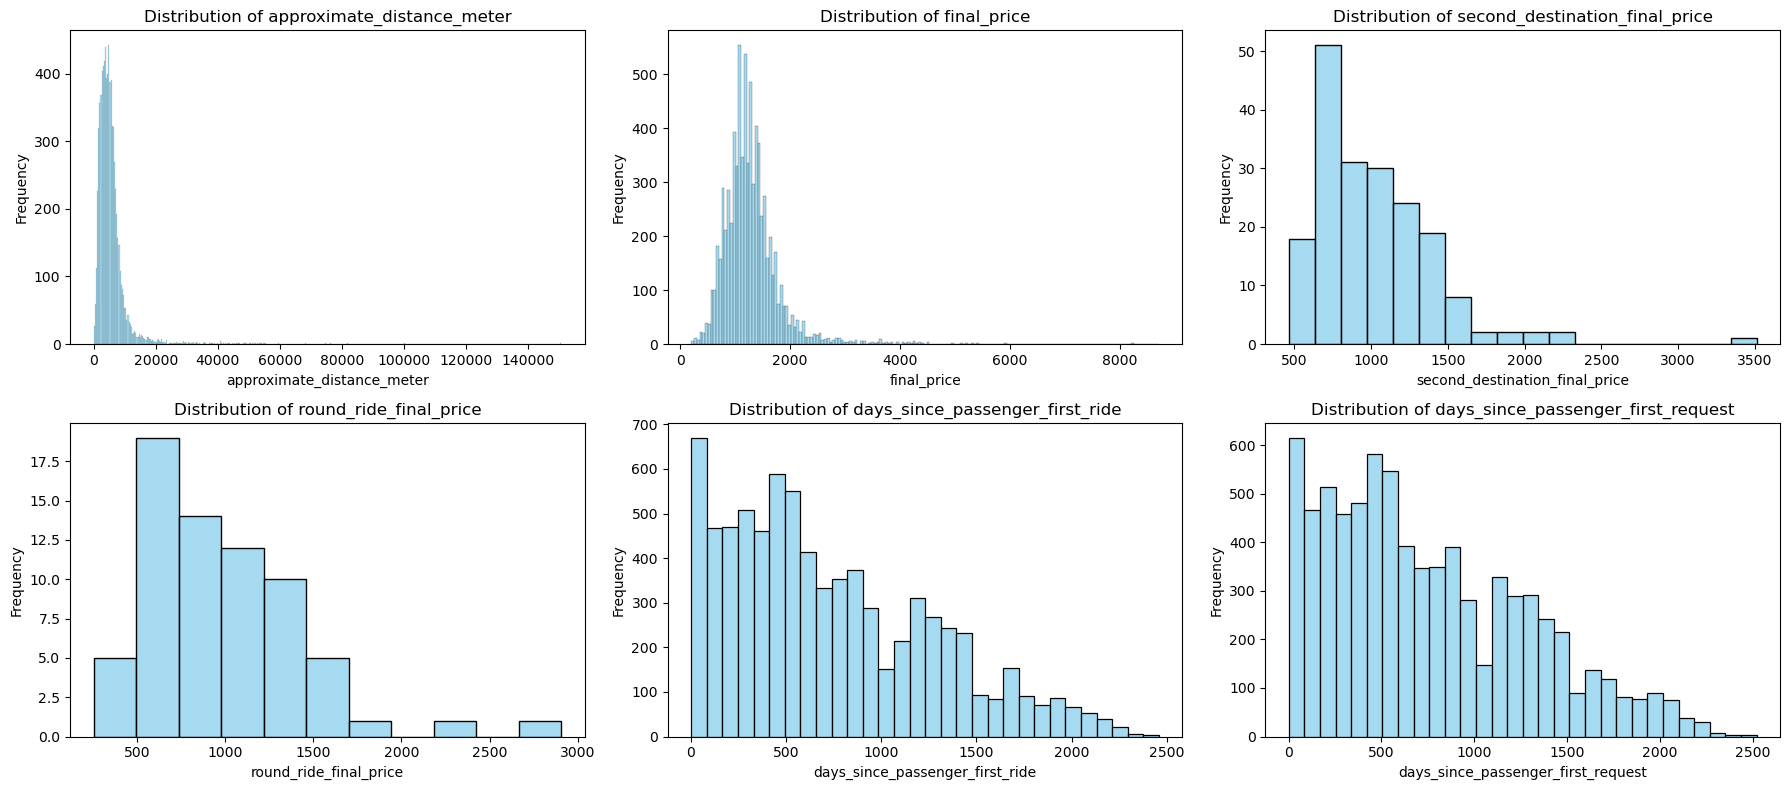

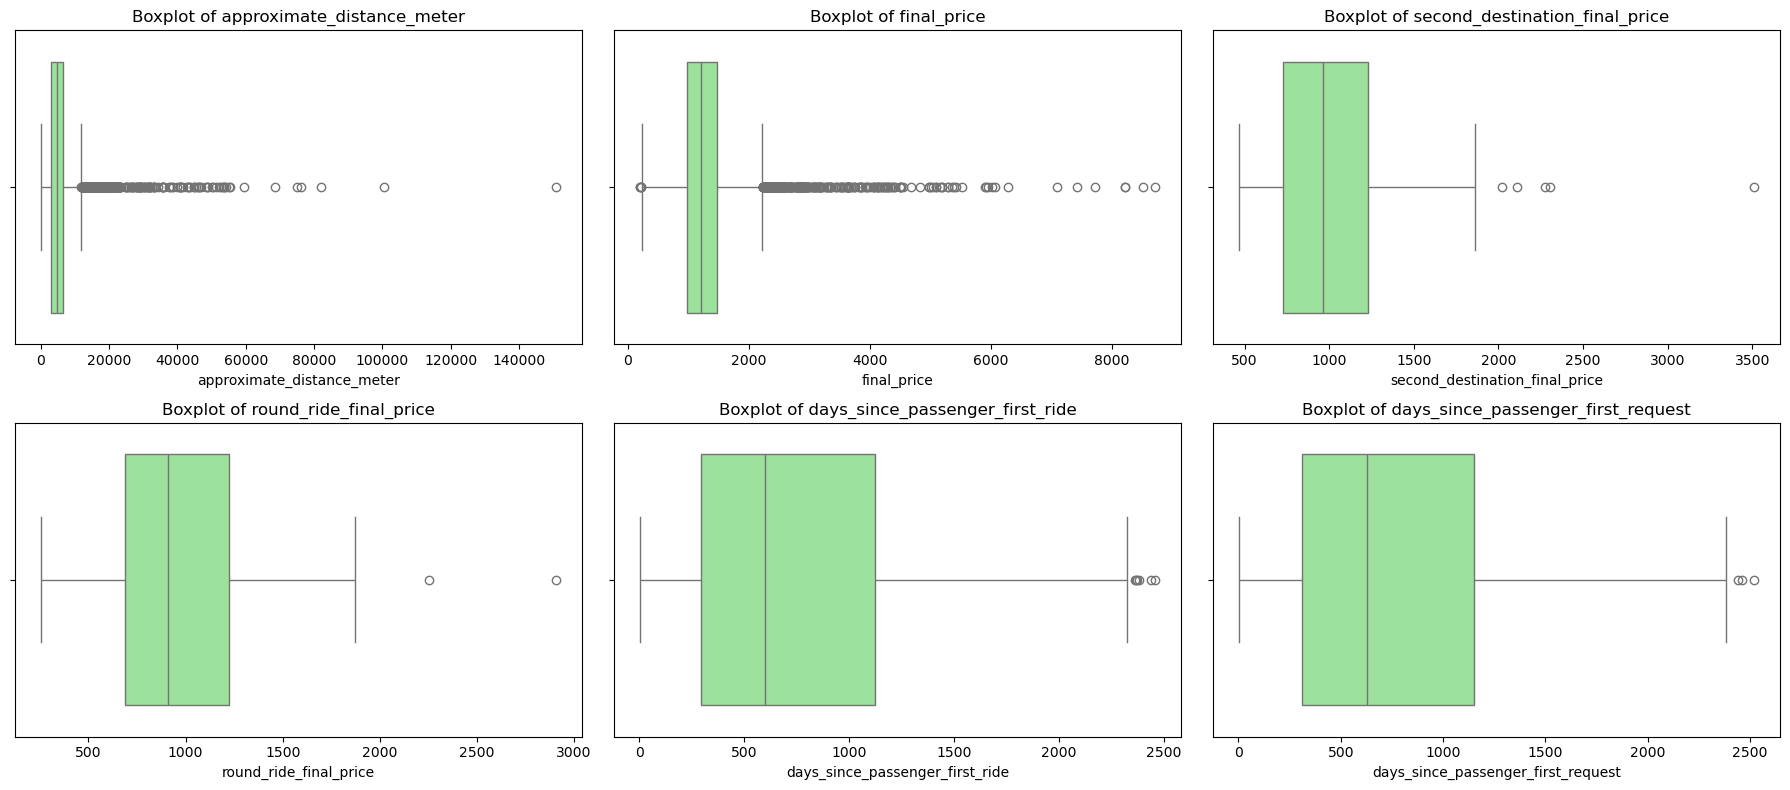

In [15]:
eda_analyzer.plot_numerical_distributions(numerical_features, mode='test')
eda_analyzer.plot_numerical_boxplots(numerical_features, mode='test')

# Distribution of Categorical Features


Frequency table for waiting_time_enabled:
waiting_time_enabled
0    79668
1     1024
Name: count, dtype: int64


Frequency table for for_friend_enabled:
for_friend_enabled
0    79258
1     1434
Name: count, dtype: int64


Frequency table for is_voucher_used:
Series([], Name: count, dtype: int64)



D:\projects\Ride-Conversion-Predictor\src\data\data_loader.py:173: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.countplot(data=self.train_df, x=feature, hue=feature, palette='Set2', legend=False)



Frequency table for intercity:
intercity
0    80637
1       55
Name: count, dtype: int64


Frequency table for requested_service_type:
requested_service_type
A    80312
E      145
B      121
D       70
C       44
Name: count, dtype: int64


Frequency table for in_hurry_enabled:
in_hurry_enabled
0    72749
1     7808
2      128
3        7
Name: count, dtype: int64


Frequency table for treatment_group:
treatment_group
A    70386
B      780
Name: count, dtype: int64


Frequency table for ride (target):
ride (target)
1    57186
0    23506
Name: count, dtype: int64



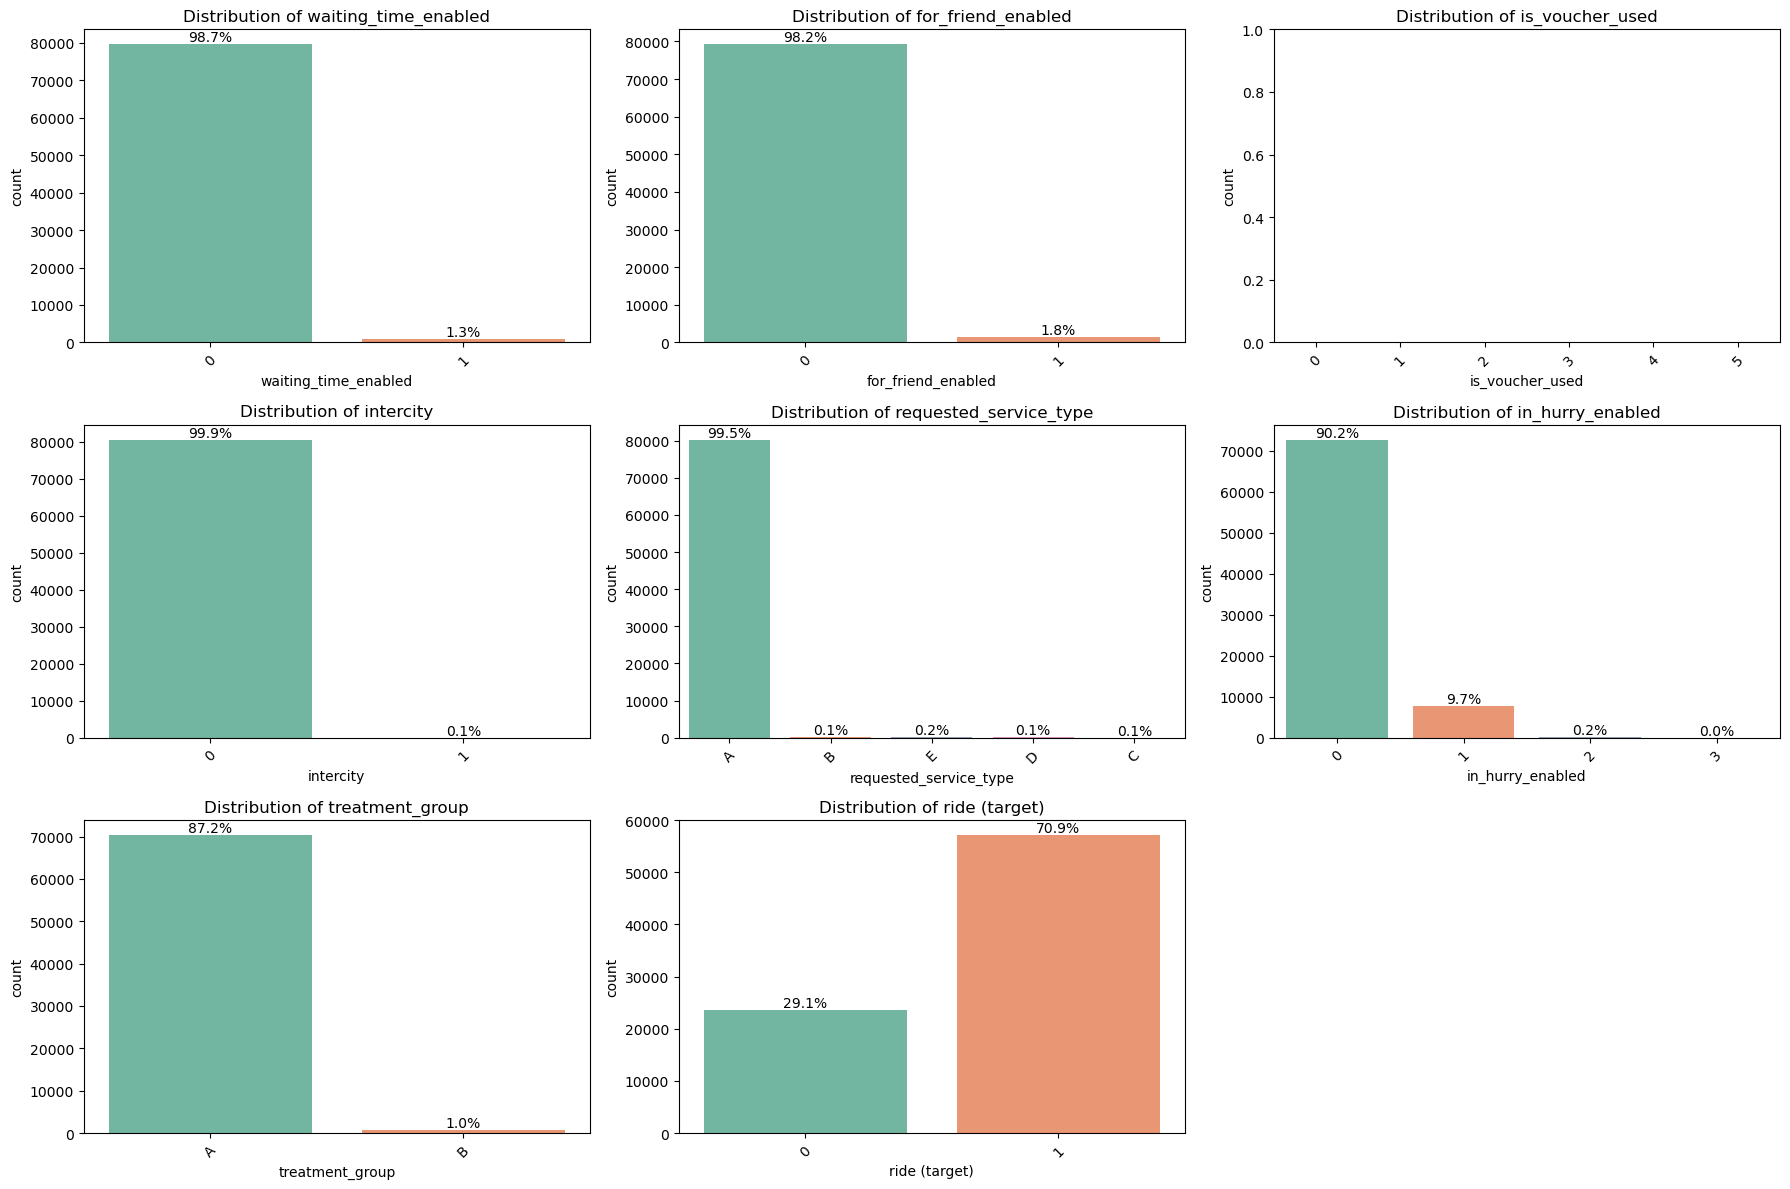

In [16]:
categorical_features = ['waiting_time_enabled', 'for_friend_enabled', 'is_voucher_used', 'intercity',
                                'requested_service_type', 'in_hurry_enabled', 'treatment_group', 'ride (target)']
eda_analyzer.plot_categorical_distributions(categorical_features)

# Correlation Analysis
### 1- fix the date time
chane the time to day of week and time of day

In [17]:
eda_analyzer.preprocess_datetime()
eda_analyzer.train_df

,passenger_unique_identifier,driver_unique_identifier,approximate_distance_meter,final_price,waiting_time_enabled,second_destination_final_price,round_ride_final_price,for_friend_enabled,is_voucher_used,intercity,...,days_since_passenger_first_ride,days_since_passenger_first_request,in_hurry_enabled,ride (target),treatment_group,"('new_origin_latitude', 'new_origin_longitude')",new_origin_latitude,new_origin_longitude,day_of_week,hour_of_day
0,2561296.0,7475532.0,6404,1200.0,0,0.000,0.0,0,NaN,0,...,2126,2126,0,1,A,"(29.488835573287513, 60.95799813622983)",29.497994,60.956137,6,6
1,66990258.0,7676730.0,5805,1700.0,0,0.000,0.0,0,NaN,0,...,963,963,0,1,A,"(29.52766176780866, 60.95992511595708)",29.525558,60.960652,0,19
2,115656004.0,7640864.0,6978,1480.0,0,0.000,0.0,0,NaN,0,...,6,150,0,1,A,"(29.52231811966853, 60.929978801338585)",29.531820,60.928104,3,21
3,103175504.0,2544250.0,4540,1000.0,0,0.000,0.0,0,NaN,0,...,343,343,0,1,A,"(29.4924079879218, 60.975839633216694)",29.473910,60.979088,2,14
4,104326018.0,7860690.0,7109,1500.0,0,0.000,0.0,0,NaN,0,...,340,340,0,1,A,"(29.51355175849473, 60.99051466786983)",29.529059,60.987724,4,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80687,8374544.0,4428076.0,6170,1420.0,0,0.000,0.0,0,NaN,0,...,2084,2084,0,1,A,"(29.497779505652208, 60.944532268227924)",29.467472,60.949278,1,19
80688,85988666.0,7546378.0,5848,1360.0,0,0.000,0.0,0,NaN,0,...,630,630,0,1,A,"(29.487415124135367, 60.9961560826996)",29.507556,60.993925,0,15
80689,96425546.0,7043482.0,7556,1600.0,0,0.000,0.0,1,NaN,0,...,460,460,0,0,A,"(29.475943393310676, 60.940927976814116)",29.474456,60.941196,2,19
80690,70646930.0,6846604.0,3346,640.0,0,0.000,0.0,0,NaN,0,...,876,890,0,1,A,"(29.46066302492407, 60.95238308075902)",29.463351,60.952157,0,9


### 2- Categorical data label encoding

In [18]:
categorical_features = ['waiting_time_enabled', 'for_friend_enabled', 'is_voucher_used', 'intercity',
                                'requested_service_type', 'in_hurry_enabled', 'treatment_group']
eda_analyzer.encode_categorical_features(categorical_features)
eda_analyzer.train_df

,passenger_unique_identifier,driver_unique_identifier,approximate_distance_meter,final_price,waiting_time_enabled,second_destination_final_price,round_ride_final_price,for_friend_enabled,is_voucher_used,intercity,...,days_since_passenger_first_ride,days_since_passenger_first_request,in_hurry_enabled,ride (target),treatment_group,"('new_origin_latitude', 'new_origin_longitude')",new_origin_latitude,new_origin_longitude,day_of_week,hour_of_day
0,2561296.0,7475532.0,6404,1200.0,0,0.000,0.0,0,0,0,...,2126,2126,0,1,0,"(29.488835573287513, 60.95799813622983)",29.497994,60.956137,6,6
1,66990258.0,7676730.0,5805,1700.0,0,0.000,0.0,0,0,0,...,963,963,0,1,0,"(29.52766176780866, 60.95992511595708)",29.525558,60.960652,0,19
2,115656004.0,7640864.0,6978,1480.0,0,0.000,0.0,0,0,0,...,6,150,0,1,0,"(29.52231811966853, 60.929978801338585)",29.531820,60.928104,3,21
3,103175504.0,2544250.0,4540,1000.0,0,0.000,0.0,0,0,0,...,343,343,0,1,0,"(29.4924079879218, 60.975839633216694)",29.473910,60.979088,2,14
4,104326018.0,7860690.0,7109,1500.0,0,0.000,0.0,0,0,0,...,340,340,0,1,0,"(29.51355175849473, 60.99051466786983)",29.529059,60.987724,4,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80687,8374544.0,4428076.0,6170,1420.0,0,0.000,0.0,0,0,0,...,2084,2084,0,1,0,"(29.497779505652208, 60.944532268227924)",29.467472,60.949278,1,19
80688,85988666.0,7546378.0,5848,1360.0,0,0.000,0.0,0,0,0,...,630,630,0,1,0,"(29.487415124135367, 60.9961560826996)",29.507556,60.993925,0,15
80689,96425546.0,7043482.0,7556,1600.0,0,0.000,0.0,1,0,0,...,460,460,0,0,0,"(29.475943393310676, 60.940927976814116)",29.474456,60.941196,2,19
80690,70646930.0,6846604.0,3346,640.0,0,0.000,0.0,0,0,0,...,876,890,0,1,0,"(29.46066302492407, 60.95238308075902)",29.463351,60.952157,0,9


### 3- Calculate correlation

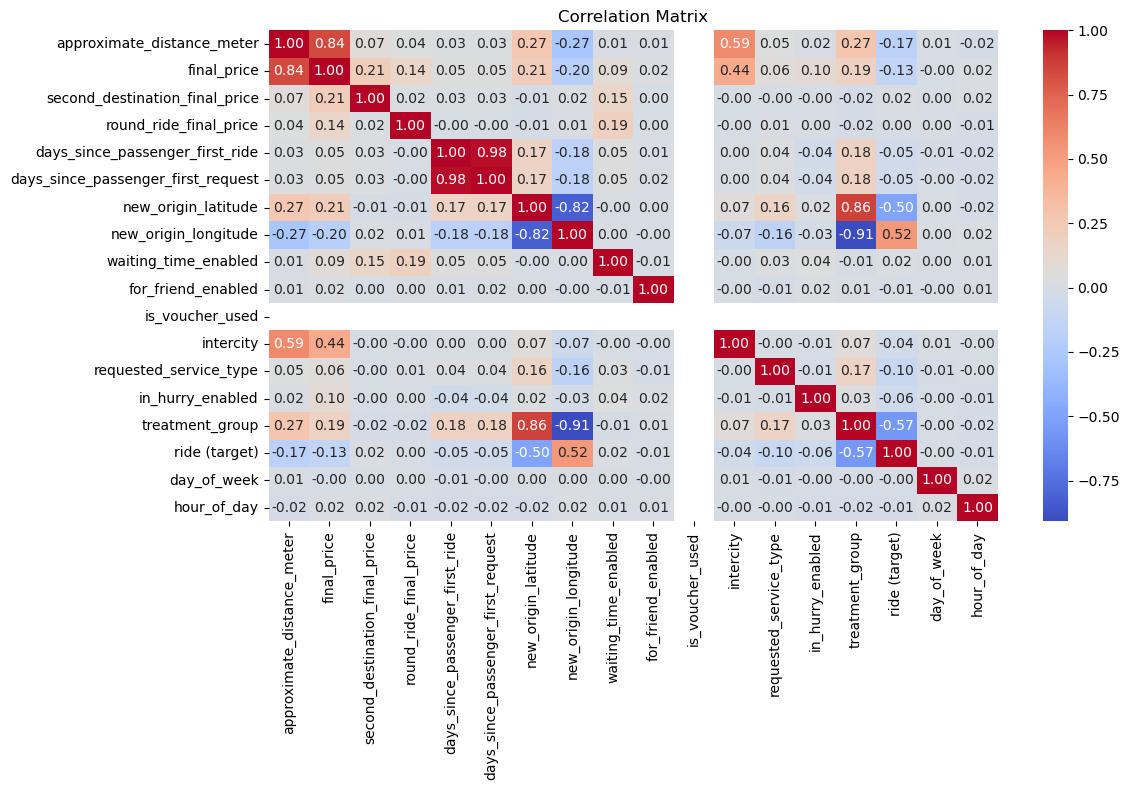

In [19]:
numerical_features = ['approximate_distance_meter', 'final_price', 'second_destination_final_price',
                      'round_ride_final_price', 'days_since_passenger_first_ride',
                      'days_since_passenger_first_request', 'new_origin_latitude', 'new_origin_longitude'
]
categorical_features = ['waiting_time_enabled', 'for_friend_enabled', 'is_voucher_used', 'intercity',
                        'requested_service_type', 'in_hurry_enabled', 'treatment_group', 'ride (target)']
target_features = ['ride (target)']
date_time_features = ['request_datetime']
eda_analyzer.correlation_analysis(numerical_features, categorical_features)

### 4- pointbiserial correlation

In [20]:
eda_analyzer.pointbiserial_correlation(numerical_features)

                              Feature  Correlation with Target
7                new_origin_longitude                 0.524487
2      second_destination_final_price                 0.016677
3              round_ride_final_price                 0.000171
8                         day_of_week                -0.000578
9                         hour_of_day                -0.010143
4     days_since_passenger_first_ride                -0.049350
5  days_since_passenger_first_request                -0.050784
1                         final_price                -0.131566
0          approximate_distance_meter                -0.174464
6                 new_origin_latitude                -0.497773


### 5- CHi Square test

In [21]:
eda_analyzer.chi_square_test(categorical_features)

waiting_time_enabled - 	 	 Chi-squared: 25.38987321934551, 	 	  p-value: 4.6837038596213676e-07
for_friend_enabled - 	 	 Chi-squared: 2.109716703506409, 	 	  p-value: 0.1463664116888551
is_voucher_used - 	 	 Chi-squared: 0.0, 	 	  p-value: 1.0
intercity - 	 	 Chi-squared: 130.4835414351693, 	 	  p-value: 3.2118430642068046e-30
requested_service_type - 	 	 Chi-squared: 928.8479423568936, 	 	  p-value: 9.355797237064184e-200
in_hurry_enabled - 	 	 Chi-squared: 299.26304232922087, 	 	  p-value: 1.436371080916169e-64
treatment_group - 	 	 Chi-squared: 26282.79096574675, 	 	  p-value: 0.0
ride (target) - 	 	 Chi-squared: 80687.1562023705, 	 	  p-value: 0.0


### 6- Regression based feature importance

In [22]:
eda_analyzer.correlation_with_target()

Correlation (Logistic Regression Coef) between waiting_time_enabled and target: 0.38262840585230007
Correlation (Logistic Regression Coef) between for_friend_enabled and target: -0.08521077462637702
Correlation (Logistic Regression Coef) between is_voucher_used and target: 0.0
Correlation (Logistic Regression Coef) between intercity and target: -3.5326286540895753
Correlation (Logistic Regression Coef) between requested_service_type and target: -3.551489163473562
Correlation (Logistic Regression Coef) between in_hurry_enabled and target: -0.4066029264978266
Correlation (Logistic Regression Coef) between treatment_group and target: -2.613558275347337


C:\Users\Navid Ziaei\.conda\envs\pytorch\Lib\site-packages\scipy\stats\_stats_py.py:5655: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)


# PCA

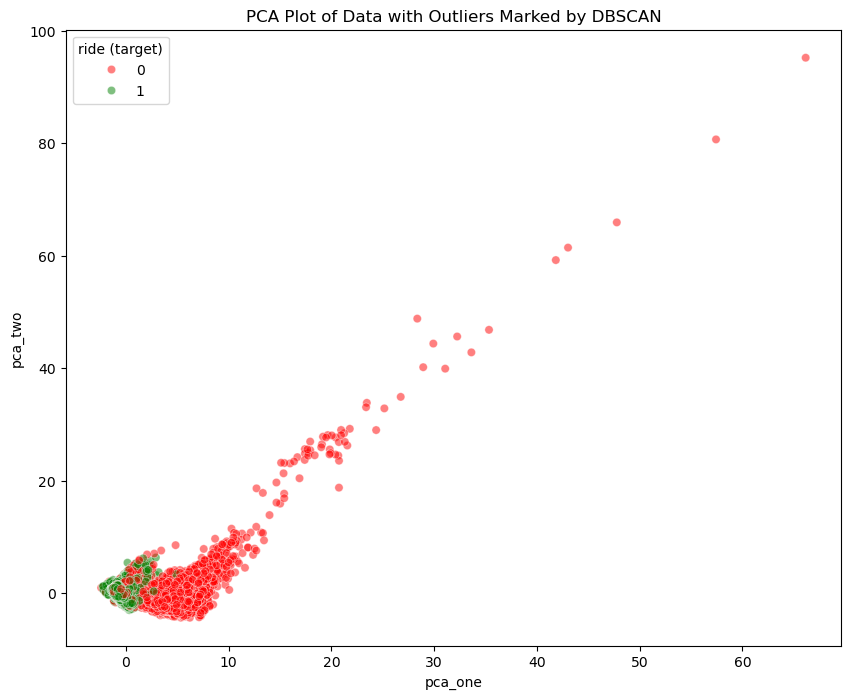

In [36]:
numerical_features = ['approximate_distance_meter', 'final_price', 'second_destination_final_price',
                      'round_ride_final_price', 'days_since_passenger_first_ride',
                      'days_since_passenger_first_request', 'new_origin_latitude', 'new_origin_longitude'
]
categorical_features = ['waiting_time_enabled', 'for_friend_enabled', 'is_voucher_used', 'intercity',
                        'requested_service_type', 'in_hurry_enabled', 'treatment_group']

selected_features = categorical_features + numerical_features
eda_analyzer.plot_pca(eda_analyzer.train_df.copy(), selected_features, file_name='pca_before_outlier_removal')

# Out-layer detection

DBSCAN identified 47 outliers.


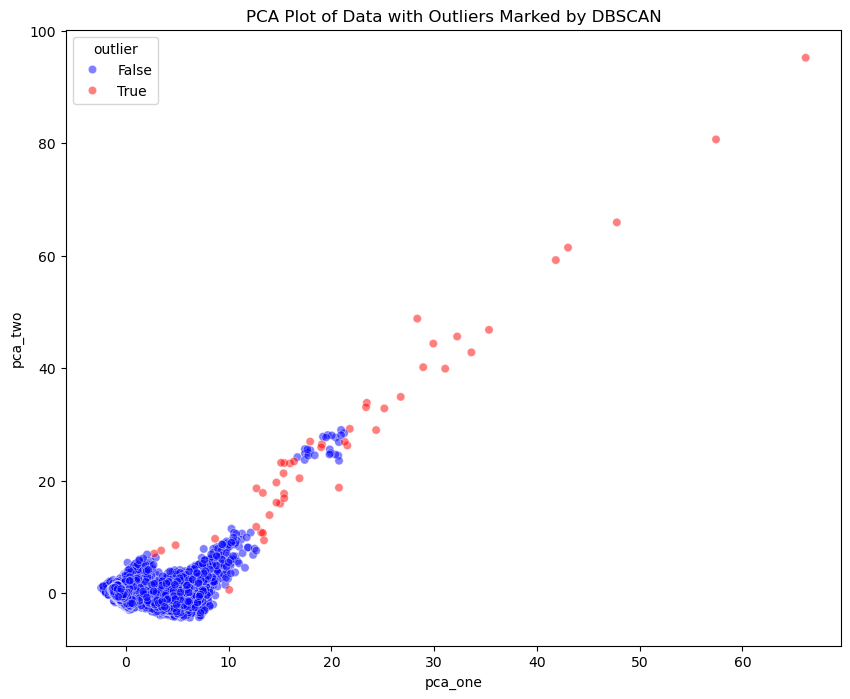

,passenger_unique_identifier,driver_unique_identifier,approximate_distance_meter,final_price,waiting_time_enabled,second_destination_final_price,round_ride_final_price,for_friend_enabled,is_voucher_used,intercity,...,days_since_passenger_first_request,in_hurry_enabled,ride (target),treatment_group,"('new_origin_latitude', 'new_origin_longitude')",new_origin_latitude,new_origin_longitude,day_of_week,hour_of_day,outlier
0,2561296.0,7475532.0,6404,1200.0,0,0.000,0.0,0,0,0,...,2126,0,1,0,"(29.488835573287513, 60.95799813622983)",29.497994,60.956137,6,6,False
1,66990258.0,7676730.0,5805,1700.0,0,0.000,0.0,0,0,0,...,963,0,1,0,"(29.52766176780866, 60.95992511595708)",29.525558,60.960652,0,19,False
2,115656004.0,7640864.0,6978,1480.0,0,0.000,0.0,0,0,0,...,150,0,1,0,"(29.52231811966853, 60.929978801338585)",29.531820,60.928104,3,21,False
3,103175504.0,2544250.0,4540,1000.0,0,0.000,0.0,0,0,0,...,343,0,1,0,"(29.4924079879218, 60.975839633216694)",29.473910,60.979088,2,14,False
4,104326018.0,7860690.0,7109,1500.0,0,0.000,0.0,0,0,0,...,340,0,1,0,"(29.51355175849473, 60.99051466786983)",29.529059,60.987724,4,14,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80687,8374544.0,4428076.0,6170,1420.0,0,0.000,0.0,0,0,0,...,2084,0,1,0,"(29.497779505652208, 60.944532268227924)",29.467472,60.949278,1,19,False
80688,85988666.0,7546378.0,5848,1360.0,0,0.000,0.0,0,0,0,...,630,0,1,0,"(29.487415124135367, 60.9961560826996)",29.507556,60.993925,0,15,False
80689,96425546.0,7043482.0,7556,1600.0,0,0.000,0.0,1,0,0,...,460,0,0,0,"(29.475943393310676, 60.940927976814116)",29.474456,60.941196,2,19,False
80690,70646930.0,6846604.0,3346,640.0,0,0.000,0.0,0,0,0,...,890,0,1,0,"(29.46066302492407, 60.95238308075902)",29.463351,60.952157,0,9,False


In [35]:
numerical_features = ['approximate_distance_meter', 'final_price', 'second_destination_final_price',
                      'round_ride_final_price', 'days_since_passenger_first_ride',
                      'days_since_passenger_first_request', 'new_origin_latitude', 'new_origin_longitude'
]
categorical_features = ['waiting_time_enabled', 'for_friend_enabled', 'is_voucher_used', 'intercity',
                        'requested_service_type', 'in_hurry_enabled', 'treatment_group']

selected_features = categorical_features + numerical_features
eda_analyzer.detect_outliers_with_dbscan(selected_features, eps=1, min_samples=5)

C:\Users\Navid Ziaei\AppData\Local\Temp\ipykernel_9396\1814869449.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('outlier', axis=1, inplace=True)


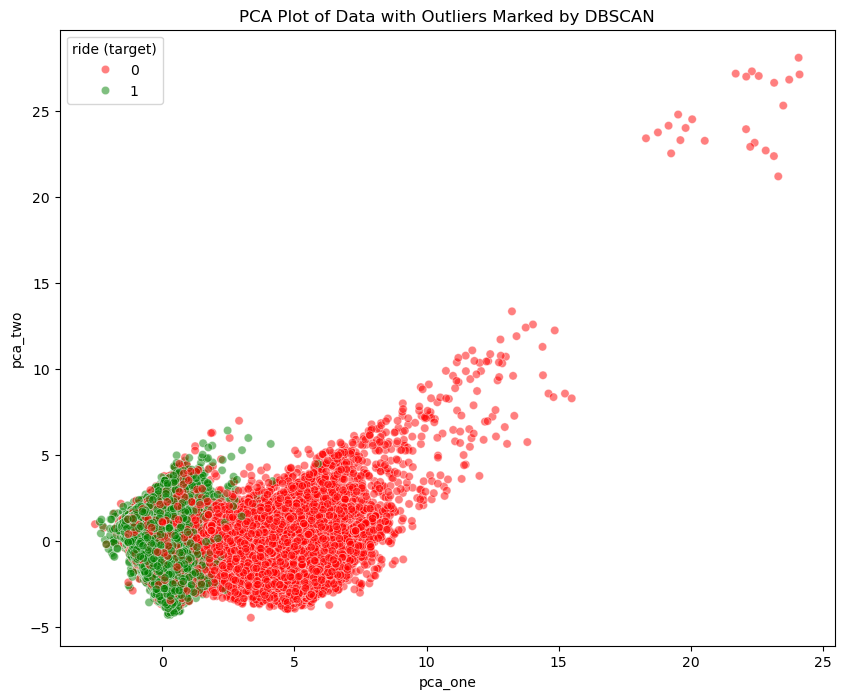

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
data = eda_analyzer.train_df[eda_analyzer.train_df['outlier']==False]
data.drop('outlier', axis=1, inplace=True)

eda_analyzer.plot_pca(data.copy(), selected_features, file_name='pca_after_outlier_removal')
        
        

